This script showcases the use of the `NmtBin()` structure to define bandpowers.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
from __future__ import print_function
from __future__ import division

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

# Import the NaMaster python wrapper
import pymaster as nmt

In [3]:
# HEALPix map resolution
nside = 256

Initialize binning scheme with bandpowers of constant width (4 multipoles per bin).

In [4]:
bin1 = nmt.NmtBin(nside, nlb=4)

Initialize binning scheme with custom-made bandpowers. In this case we simply manually choose these bandpowers to also have 4 multipoles per bin.

In [5]:
ells = np.arange(3 * nside, dtype='int32') # Array of multipoles
weights = 0.25 * np.ones_like(ells) # Array of weights
bpws = -1 + np.zeros_like(ells) # Array of bandpower indices

i = 0
while 4 * (i + 1) + 2 < (3 * nside):
    bpws[4 * i + 2:4 * (i + 1) + 2] = i
    i += 1

bin2 = nmt.NmtBin(nside, bpws=bpws, ells=ells, weights=weights)

/Users/dlenz/anaconda/envs/py27/lib/python2.7/site-packages/pymaster/bins.py:15: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if((bpws==None) and (ells==None) and (weights==None) and (nlb==None)) :
/Users/dlenz/anaconda/envs/py27/lib/python2.7/site-packages/pymaster/bins.py:19: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if((bpws==None) and (ells==None) and (weights==None)) :


In [9]:
# At this stage bin1 and bin2 should be identical
print(np.sum(bin1.get_effective_ells() - bin2.get_effective_ells()))

0.0


In [10]:
# Array with effective multipole per bandpower
ell_eff = bin1.get_effective_ells()

In [13]:
#Bandpower info:
print("Bandpower info:")
print("{} bandpowers".format(bin1.get_n_bands()))
print("The columns in the following table are:")
print("[1]-band index, [2]-list of multipoles, [3]-list of weights, [4]=effective multipole")
for i in np.arange(bin1.get_n_bands()) :
    print(i, bin1.get_ell_list(i), bin1.get_weight_list(i), ell_eff[i])
print("")

Bandpower info:
191 bandpowers
The columns in the following table are:
 [1]-band index, [2]-list of multipoles, [3]-list of weights, [4]=effective multipole
0 [2 3 4 5] [ 0.25  0.25  0.25  0.25] 3.5
1 [6 7 8 9] [ 0.25  0.25  0.25  0.25] 7.5
2 [10 11 12 13] [ 0.25  0.25  0.25  0.25] 11.5
3 [14 15 16 17] [ 0.25  0.25  0.25  0.25] 15.5
4 [18 19 20 21] [ 0.25  0.25  0.25  0.25] 19.5
5 [22 23 24 25] [ 0.25  0.25  0.25  0.25] 23.5
6 [26 27 28 29] [ 0.25  0.25  0.25  0.25] 27.5
7 [30 31 32 33] [ 0.25  0.25  0.25  0.25] 31.5
8 [34 35 36 37] [ 0.25  0.25  0.25  0.25] 35.5
9 [38 39 40 41] [ 0.25  0.25  0.25  0.25] 39.5
10 [42 43 44 45] [ 0.25  0.25  0.25  0.25] 43.5
11 [46 47 48 49] [ 0.25  0.25  0.25  0.25] 47.5
12 [50 51 52 53] [ 0.25  0.25  0.25  0.25] 51.5
13 [54 55 56 57] [ 0.25  0.25  0.25  0.25] 55.5
14 [58 59 60 61] [ 0.25  0.25  0.25  0.25] 59.5
15 [62 63 64 65] [ 0.25  0.25  0.25  0.25] 63.5
16 [66 67 68 69] [ 0.25  0.25  0.25  0.25] 67.5
17 [70 71 72 73] [ 0.25  0.25  0.25  0.25] 71.5

We now demonstrate this binning for a power spectrum

In [14]:
# Read the TT power spectrum
data = np.loadtxt("../test/cls.txt", unpack=True)
ell_arr = data[0]
cl_tt = data[1]

In [16]:
# Bin the power spectrum into bandpowers
cl_tt_binned = bin1.bin_cell([cl_tt])

In [17]:
# Unbin bandpowers
cl_tt_binned_unbinned = bin1.unbin_cell(cl_tt_binned)

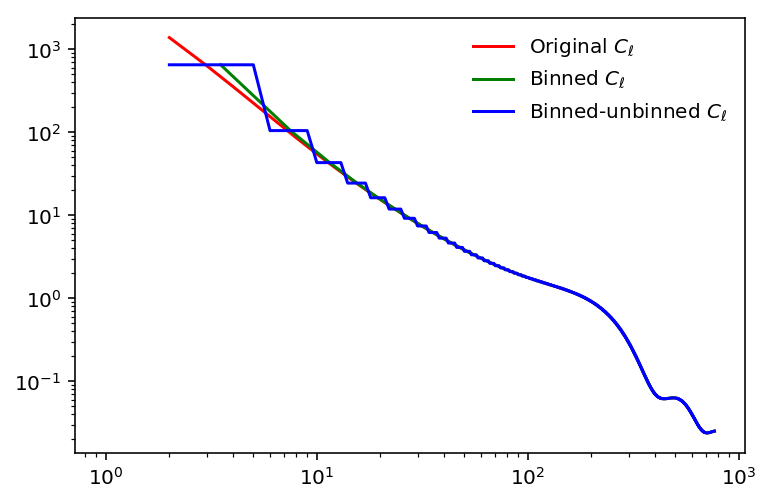

In [19]:
# Plot all to see differences
plt.plot(ell_arr, cl_tt, 'r-', label='Original $C_\\ell$')
plt.plot(ell_eff, cl_tt_binned[0],'g-', label='Binned $C_\\ell$')
plt.plot(ell_arr, cl_tt_binned_unbinned[0], 'b-', label='Binned-unbinned $C_\\ell$')
plt.loglog()

plt.legend(loc='upper right', frameon=False);